In [7]:
## IMPORTS ##
import re
import csv
import pandas as pd
import numpy as np
import sys

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [8]:
### CONSTANTS ###
DATA_LINE = 15
ORIGINAL_FILENAME = "wine_quality.csv"
CLEANED_FILENAME = "wine_quality_cleaned2.csv"

### SET YOUR K, T, R1, R2 ###
K = 5
T = 5
R1 = 1
R2 = 25

In [3]:
### CLEAN CSV FILE - ONLY RUN ONCE TO GET CLEANED CSV ###
# file = open('{}'.format(ORIGINAL_FILENAME), "r")

# fieldnames = []
# for i in range(0, DATA_LINE-1):
#     line = file.readline()
#     m = re.search('(?<=@attribute )(.+)(?= \w+)', line)
#     if (m):
#         fieldnames.append(m.group(0))

# with open('{}'.format(CLEANED_FILENAME), "w", newline="") as clean_csv:
#     clean_csv.write(','.join(fieldnames) + "\n")
#     for line in file:
#         clean_csv.write(file.readline())

# file.close()

In [9]:
# READ DATA #
data = pd.read_csv("wine_quality_cleaned.csv")
data

,fixedacid,volacid,citricacid,residualsugar,chlorides,freesulfur,totalsulfur,density,pH,sulphates,alcohol,quality
0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.90,6
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
2,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.00,6
3,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.99470,3.14,0.53,9.70,5
4,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.40,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2445,6.5,0.33,0.38,8.3,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,11
2446,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6
2447,6.8,0.22,0.36,1.2,0.052,38.0,127.0,0.99330,3.04,0.54,9.20,5
2448,6.1,0.34,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.80,6


In [25]:
z=data.quality.unique()
print("Class:\n",z)
X = data.iloc[:, :-1].values
print("X: \n", X)
y = data.iloc[:, 11].values
print("y: \n", y)

Class:
 [ 6  5  7  8  4  3  9  0 11]
[[ 7.2   0.23  0.32 ...  3.19  0.4   9.9 ]
 [ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 8.1   0.22  0.43 ...  3.22  0.45 11.  ]
 ...
 [ 6.8   0.22  0.36 ...  3.04  0.54  9.2 ]
 [ 6.1   0.34  0.29 ...  3.06  0.44 11.8 ]
 [ 6.5   0.23  0.38 ...  3.29  0.54  9.7 ]]
y: 
 [6 6 6 ... 5 6 5]


In [11]:
# KNN model - NO CROSS VALUATION
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
#Testing kNN Model
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('always')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn import metrics
print("Training accuracy: ",metrics.accuracy_score(y_test, y_pred))

[[  0   0   2   1   0   0   0   0]
 [  0   4   6   4   1   0   0   0]
 [  0   2  65  86  15   2   0   0]
 [  0   2  59 120  25   4   0   0]
 [  0   1  17  35  19   1   0   0]
 [  0   0   5   9   3   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.44      0.27      0.33        15
           5       0.42      0.38      0.40       170
           6       0.47      0.57      0.51       210
           7       0.30      0.26      0.28        73
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

    accuracy                           0.42       490
   macro avg       0.20      0.19      0.19       490
weighted avg       0.41      0.42      0.41       490

Training accuracy:  0.42448979591836733


C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
#  Part 4 – Cross validation
from sklearn.model_selection import KFold
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=100)
classifier = KNeighborsClassifier(n_neighbors=4)
x1 = data.iloc[:, :-1].values
y1 = data.iloc[:, 11].values
results_kfold = model_selection.cross_val_score(classifier, x1, y1, cv=kfold,scoring='accuracy')

In [32]:
print(results_kfold)
print(results_kfold.mean())

[0.38367347 0.44081633 0.49795918 0.3755102  0.35102041 0.42040816
 0.37959184 0.47346939 0.46122449 0.45714286]
0.4240816326530612


In [34]:
#Part 5 - Optimizing  n-neighbor parameter 
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid.fit(x1, y1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}


C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [35]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00318842, 0.00321476, 0.00398357, 0.0031846 , 0.00243556,
        0.00646975, 0.00426681, 0.00416377, 0.00386519, 0.0039331 ,
        0.00306644, 0.00455058, 0.00385077, 0.00263941]),
 'std_fit_time': array([0.00101747, 0.00045705, 0.00051278, 0.00092857, 0.0006398 ,
        0.00612131, 0.0012933 , 0.00125   , 0.00061369, 0.00047933,
        0.00137367, 0.00081951, 0.00144579, 0.00167863]),
 'mean_score_time': array([0.01819198, 0.01909075, 0.02117524, 0.01730154, 0.01940684,
        0.02925842, 0.02385502, 0.02923055, 0.02196505, 0.03108683,
        0.01643548, 0.03193364, 0.02475336, 0.01996775]),
 'std_score_time': array([0.00582285, 0.00849625, 0.00514233, 0.00389197, 0.01069327,
        0.00583166, 0.00786003, 0.00825701, 0.00385013, 0.00552091,
        0.00691687, 0.00382568, 0.00918101, 0.00886227]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, False, Fal

In [40]:
# create a list of the mean scores only
# list comprehension to loop through grid.cv_results_
grid_mean_scores = grid.cv_results_["mean_test_score"]
print(grid_mean_scores)

[0.44244898 0.41959184 0.41632653 0.42612245 0.42734694 0.42122449
 0.42244898 0.41795918 0.42408163 0.42408163 0.42816327 0.42204082
 0.42204082 0.42612245]


Text(0, 0.5, 'Cross-Validated Accuracy')

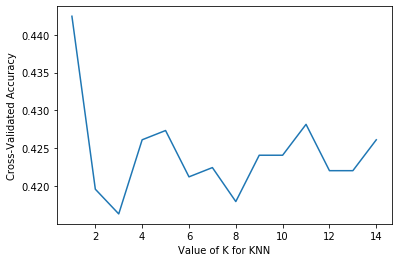

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.4424489795918367
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [10]:
# KNN model - WITH CROSS VALUATION
scores = cross_val_score(classifier, X, y, cv=T)
print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores:  [0.4        0.41260163 0.39059305 0.42827869 0.42592593]
Accuracy: 0.41 (+/- 0.03)


/Users/chinhnguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [11]:
# KNN model - WITH gridSearchCV
param_grid = dict(n_neighbors=np.arange(R1, R2+1)) # inclusive
print("param_grid: ", param_grid)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=T, scoring="accuracy")
print("X: \n", X)
print("y: \n", y)
clf.fit(X, y)

param_grid:  {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])}
X: 
 [[ 7.2   0.23  0.32 ...  3.19  0.4   9.9 ]
 [ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 8.1   0.22  0.43 ...  3.22  0.45 11.  ]
 ...
 [ 6.8   0.22  0.36 ...  3.04  0.54  9.2 ]
 [ 6.1   0.34  0.29 ...  3.06  0.44 11.8 ]
 [ 6.5   0.23  0.38 ...  3.29  0.54  9.7 ]]
y: 
 [6 6 6 ... 5 6 5]


/Users/chinhnguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [12]:
clf.cv_results_['mean_test_score']

array([0.44367347, 0.42285714, 0.41142857, 0.42      , 0.42081633,
       0.42285714, 0.42122449, 0.42489796, 0.42122449, 0.42612245,
       0.4322449 , 0.42693878, 0.42693878, 0.43061224, 0.42938776,
       0.43469388, 0.43755102, 0.43469388, 0.43387755, 0.42408163,
       0.42979592, 0.42897959, 0.43510204, 0.43714286, 0.4477551 ])

In [20]:
grid_df = pd.DataFrame(clf.cv_results_).sort_values(
        by=['rank_test_score']).set_index('rank_test_score')
display_cols = ['param_n_neighbors', "mean_test_score", "std_test_score"]

grid_df[display_cols]

,param_n_neighbors,mean_test_score,std_test_score
rank_test_score,,,
1,25,0.447755,0.020341
2,1,0.443673,0.022685
3,17,0.437551,0.026761
4,24,0.437143,0.024565
5,23,0.435102,0.023254
6,18,0.434694,0.022896
6,16,0.434694,0.019856
8,19,0.433878,0.019987
9,11,0.432245,0.027673


In [15]:
print("best score: ", clf.best_score_)
print("best param: ", clf.best_params_)
print("best estimator: ", clf.best_estimator_)

best_line = { key : clf.cv_results_[key][clf.best_index_] for key in clf.cv_results_.keys() }
print("Best accuracy: %0.2f (+/- %0.2f) when k = %.0f" %
      (best_line['mean_test_score'], best_line['std_test_score'] * 2, best_line['param_n_neighbors']))

best score:  0.4477551020408163
best param:  {'n_neighbors': 25}
best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')
Best accuracy: 0.45 (+/- 0.04) when k = 25
